In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mpl_style
plt.style.use(mpl_style.style)

from microlensing.IPM.ipm import IPM
from microlensing.CCF.ccf import CCF
from microlensing.NCC.ncc import NCC

In [2]:
ipm = IPM(verbose=1, kappa_tot=0.4, shear=0.4, smooth_fraction=0.5, 
          rectangular=True, approx=True, half_length_y1=25, half_length_y2=25,
          mass_function='kroupa', m_lower=0.08, m_upper=100,
          num_pixels_y1=5000, num_pixels_y2=5000,
          write_maps=False, write_parities=False, write_histograms=False)

In [3]:
ipm.random_seed = 0 # settings to 0 will cause object to generate a random seed of its own

In [4]:
ipm.run()

Generating star field...
100 %generating star field. Elapsed time:  %

In [5]:
ipm.num_stars

17313

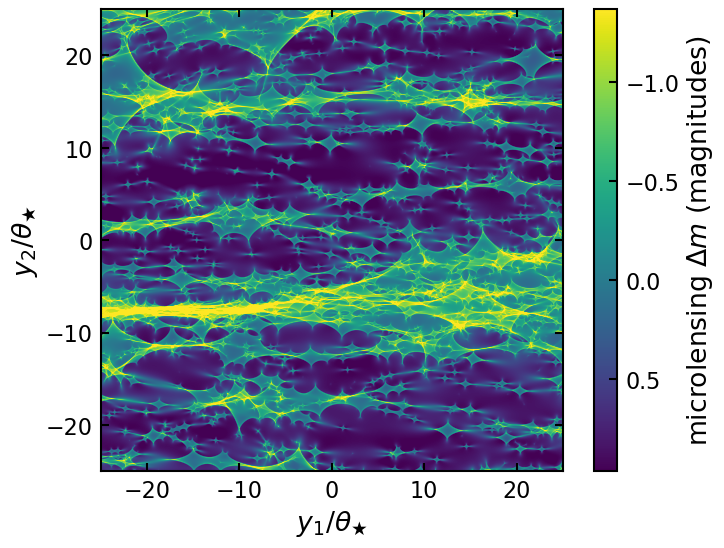

In [6]:
fig, ax = plt.subplots()
ipm.plot(ax)
plt.show()

In [7]:
ipm.save()

In [8]:
ccf = CCF(verbose=1, kappa_tot=ipm.kappa_tot, shear=ipm.shear, starfile=f'{ipm.outfile_prefix}ipm_stars.bin',
          num_phi=200, write_stars=False, write_critical_curves=False, write_caustics=True, write_length_scales=False)

In [9]:
ccf.run()

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 

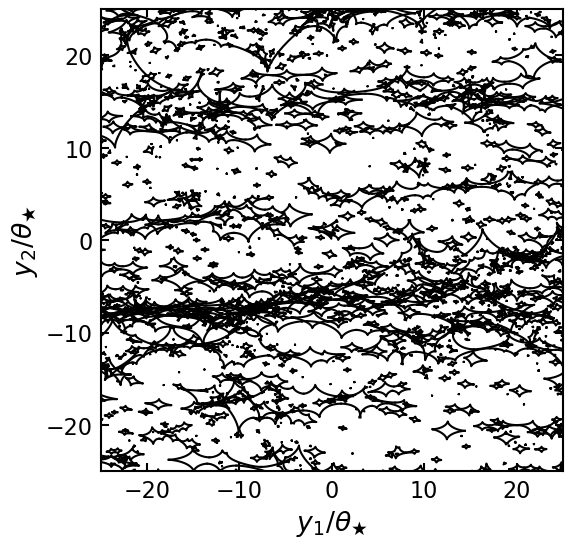

In [10]:
fig, ax = plt.subplots()
ccf.plot_caustics(ax, color='black')
ax.set_xlim([-ipm.half_length[0], ipm.half_length[0]])
ax.set_ylim([-ipm.half_length[1], ipm.half_length[1]])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

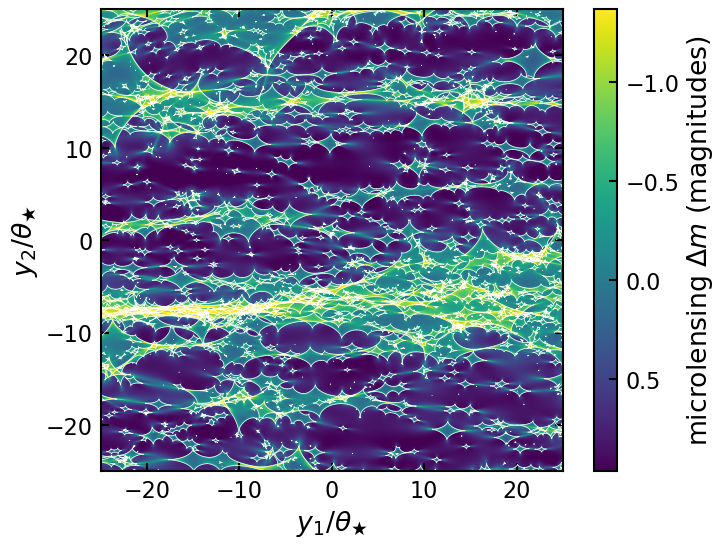

In [11]:
fig, ax = plt.subplots()
ipm.plot(ax)
ccf.plot_caustics(ax, c='white', lw=0.5)
ax.set_xlim([-ipm.half_length[0], ipm.half_length[0]])
ax.set_ylim([-ipm.half_length[1], ipm.half_length[1]])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

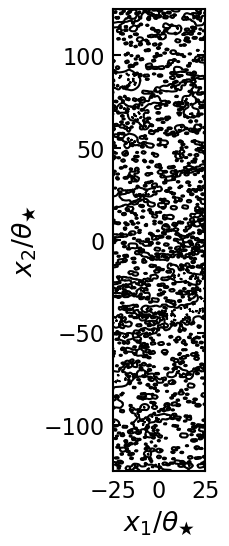

In [12]:
fig, ax = plt.subplots()
ccf.plot_critical_curves(ax)
ax.set_xlim([-ipm.half_length[0] / np.abs(1 - ipm.kappa_tot + ipm.shear), 
             ipm.half_length[0] / np.abs(1 - ipm.kappa_tot + ipm.shear)])
ax.set_ylim([-ipm.half_length[1] / np.abs(1 - ipm.kappa_tot - ipm.shear), 
             ipm.half_length[1] / np.abs(1 - ipm.kappa_tot - ipm.shear)])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

In [13]:
ccf.save()

In [14]:
ncc = NCC(verbose=1, over_sample=0, center_y1=ipm.center_y1, center_y2=ipm.center_y2,
          half_length_y1=ipm.half_length_y1, half_length_y2=ipm.half_length_y2,
          num_pixels_y1=ipm.num_pixels_y1, num_pixels_y2=ipm.num_pixels_y2,
          write_maps=False, write_histograms=False)

In [15]:
ncc.run()

Reading in caustics...
100 %reading in caustics. Elapsed time: 

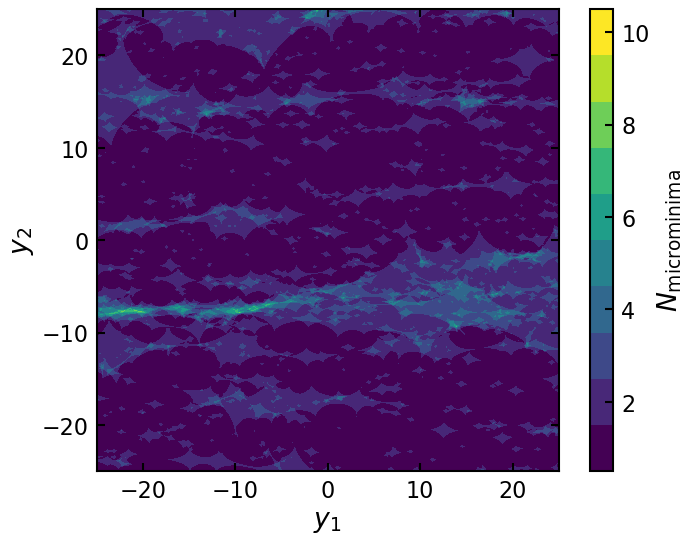

In [16]:
fig, ax = plt.subplots()
ncc.plot_map(ax)
plt.show()

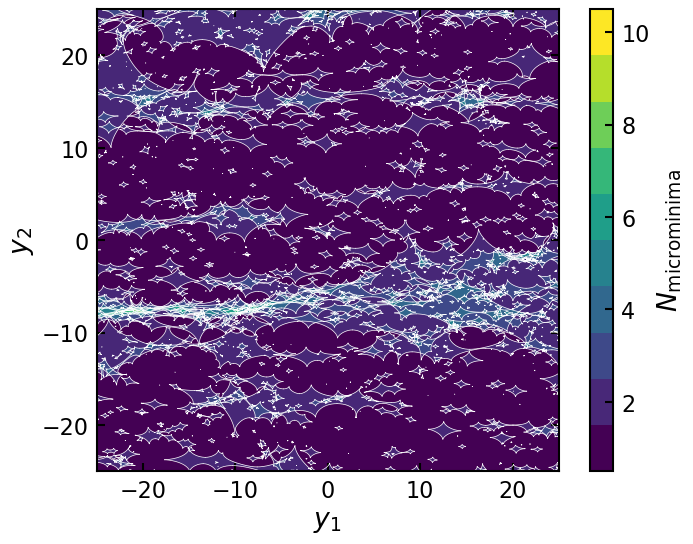

In [17]:
fig, ax = plt.subplots()
ccf.plot_caustics(ax, color='white', linewidth=0.5)
ncc.plot_map(ax)
ax.set_xlim([-ipm.half_length[0], ipm.half_length[0]])
ax.set_ylim([-ipm.half_length[1], ipm.half_length[1]])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()